In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
import matplotlib.patches as mpatches
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from scipy import stats

pd.options.display.max_colwidth = 1000
pd.options.mode.chained_assignment = None

In [16]:
df = pd.read_excel('../data_processed/men_women_activists.xlsx')

In [17]:
df.head(4)

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
0,us taking action sanction involved repressing women girl afghanistan continue press,ahmadjavid,2022-10-12,male,pashtun,1,positive,0.100000
1,beyond religious side isis openly engaging recruitment drives right local school university,ahmadjavid,2022-09-26,male,pashtun,1,positive,0.171429
2,today im announcing million funding women empowerment food security girl education afghanistan,ahmadjavid,2022-08-13,male,pashtun,1,neutral,0.000000
3,us preparing military aid package india deepen security ties reduce countrys dependence russi,ahmadjavid,2022-05-17,male,pashtun,0,negative,-0.100000


In [42]:
x = df['text']
sentiment_labels = []
sentiment_scores = []
for tweet in x:
    # Create a TextBlob object
    blob = TextBlob(tweet)
    # Get the sentiment polarity (-1 to 1)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    sentiment_labels.append(sentiment)
    sentiment_scores.append(polarity)
# Add the sentiment labels and scores as new columns in the DataFrame
df['sentiment'] = sentiment_labels
df['sentiment_score'] = sentiment_scores

In [48]:
# Add the sentiment labels and scores as new columns in the DataFrame
df['sentiment'] = sentiment_labels
df['sentiment_score'] = sentiment_scores

# Calculate sentiment counts for each gender and sentiment category
sentiment_counts = df.groupby(['gender', 'sentiment']).size().unstack()
# Calculate sentiment percentages for each gender
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Add the sentiment percentages to the DataFrame
df_sentiment_percentage = pd.DataFrame(sentiment_percentages)
df_sentiment_percentage.columns = [f'{col} %' for col in df_sentiment_percentage.columns]

# Display the DataFrame
df_sentiment_percentage.head()


,negative %,neutral %,positive %
gender,,,
female,22.171192,38.989035,38.839773
male,22.483915,47.748162,29.767923


In [49]:
# Add the sentiment labels as a new column in the DataFrame
df['sentiment'] = sentiment_labels

# Filter the DataFrame for each gender and count the sentiment labels
gender_sentiment_counts = df[df['gender'] == 'male']['sentiment'].value_counts().to_frame('Male').join(
    df[df['gender'] == 'female']['sentiment'].value_counts().to_frame('Female'))

# Display the counts of positive, negative, and neutral tweets for each gender
gender_sentiment_counts.head()

,Male,Female
sentiment,,
neutral,8312,13583
positive,5182,13531
negative,3914,7724


##### keywords = ['education', 'school', 'university', 'women', 'girl']

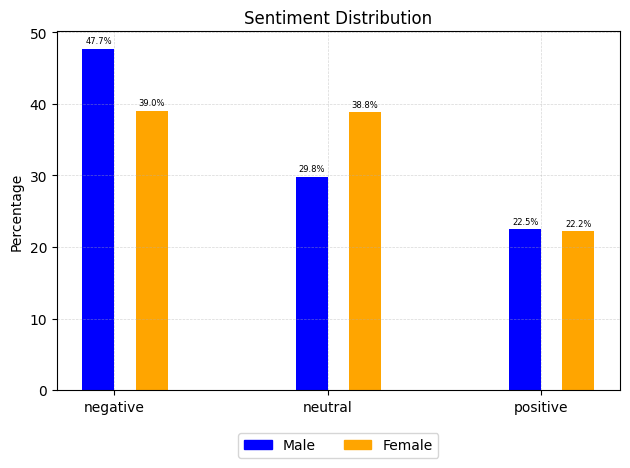

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calculate sentiment counts for males and females
male_sentiment_counts = df[df['gender'] == 'male']['sentiment'].value_counts()
female_sentiment_counts = df[df['gender'] == 'female']['sentiment'].value_counts()

# Calculate sentiment percentages for males and females
male_sentiment_percentages = (male_sentiment_counts / male_sentiment_counts.sum()) * 100
female_sentiment_percentages = (female_sentiment_counts / female_sentiment_counts.sum()) * 100

# Get all unique sentiment categories
sentiment_categories = sorted(df['sentiment'].unique())

# Set the width of each bar (adjust as desired)
bar_width = 0.15

# Calculate the x positions for the bars
male_x = np.arange(len(sentiment_categories))
female_x = male_x + bar_width + 0.1  # Adding additional spacing between groups

# Set the y-axis label
plt.ylabel('Percentage')

# Plot the sentiment percentages for males
plt.bar(male_x, male_sentiment_percentages, width=bar_width, color='blue', label='Male')
# Plot the sentiment percentages for females
plt.bar(female_x, female_sentiment_percentages, width=bar_width, color='orange', label='Female')

# Set the title at the top
plt.title('Sentiment Distribution')

# Add labels for sentiment categories
plt.xticks(male_x + bar_width / 2, sentiment_categories)

# Add color patches and labels for male and female below the bars
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='orange', label='Female')
plt.legend(handles=[male_patch, female_patch], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add percentage labels on top of each bar with smaller font size
for x, percentage in enumerate(male_sentiment_percentages):
    plt.text(male_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)

for x, percentage in enumerate(female_sentiment_percentages):
    plt.text(female_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)

# Adjust the layout to provide space for the percentage labels
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
# Create empty lists to store the sentiment distributions for males and females
male_sentiment_data = []
female_sentiment_data = []
# Loop through each keyword and calculate the sentiment of tweets containing that keyword
for keyword in ['women', 'education', 'school', 'university', 'girl']:
    keyword_tweets_male = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'male')].copy()
    keyword_tweets_female = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'female')].copy()
    # Calculate the sentiment score for each tweet using SentimentIntensityAnalyzer
    keyword_tweets_male['sentiment_score'] = keyword_tweets_male['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    keyword_tweets_female['sentiment_score'] = keyword_tweets_female['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    # Calculate the sentiment distribution for males
    sentiment_distribution_male = keyword_tweets_male['sentiment'].value_counts(normalize=True) * 100
    # Calculate the sentiment distribution for females
    sentiment_distribution_female = keyword_tweets_female['sentiment'].value_counts(normalize=True) * 100
    # Append the sentiment distributions for males and females to the respective lists
    male_sentiment_data.append(sentiment_distribution_male)
    female_sentiment_data.append(sentiment_distribution_female)
# Create DataFrames for males and females sentiment distributions
male_sentiment_df = pd.DataFrame(male_sentiment_data, index=['women', 'education', 'school', 'university', 'girl'])
female_sentiment_df = pd.DataFrame(female_sentiment_data, index=['women', 'education', 'school', 'university', 'girl'])
# Transpose the DataFrames to have sentiment categories as columns
male_sentiment_df = male_sentiment_df.T
female_sentiment_df = female_sentiment_df.T
# Combine the male and female DataFrames into a single DataFrame
combined_sentiment_df = pd.concat([male_sentiment_df, female_sentiment_df], axis=1, keys=['Male', 'Female'])
# Format the sentiment percentages to display two decimal places
combined_sentiment_df = combined_sentiment_df.round(2)
# Print the combined DataFrame
print("Combined Sentiment Analysis:")
combined_sentiment_df.head()


Combined Sentiment Analysis:


Male                                    Female                   \
           women education school university   girl  women education school   
sentiment                                                                     
neutral    53.90     41.71  47.33      56.70  46.96  41.18     31.19  39.98   
positive   29.04     43.34  27.06      27.31  31.09  39.61     48.55  33.96   
negative   17.06     14.95  25.61      15.99  21.95  19.21     20.25  26.05   

                             
          university   girl  
sentiment                    
neutral        43.85  39.66  
positive       36.51  37.04  
negative       19.64  23.29

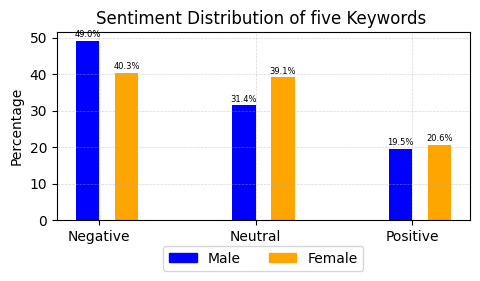

In [21]:
# Filter the DataFrame based on the specified keywords
keywords = ['education', 'school', 'university', 'women', 'girl']
filtered_df = df[df['text'].str.contains('|'.join(keywords), case=False, regex=True)]
# Calculate sentiment counts for males and females
male_sentiment_counts = filtered_df[filtered_df['gender'] == 'male']['sentiment'].value_counts()
female_sentiment_counts = filtered_df[filtered_df['gender'] == 'female']['sentiment'].value_counts()
# Calculate sentiment percentages for males and females
male_sentiment_percentages = (male_sentiment_counts / male_sentiment_counts.sum()) * 100
female_sentiment_percentages = (female_sentiment_counts / female_sentiment_counts.sum()) * 100
# Get all unique sentiment categories
sentiment_categories = sorted(filtered_df['sentiment'].unique())
# Set the width of each bar (adjust as desired)
bar_width = 0.15
# Calculate the x positions for the bars
male_x = np.arange(len(sentiment_categories))
female_x = male_x + bar_width + 0.1  # Adding additional spacing between groups
plt.figure(figsize=(4.9, 2.95))  # Set the figure size in inches
# Set the y-axis label
plt.ylabel('Percentage')
# Plot the sentiment percentages for males
plt.bar(male_x, male_sentiment_percentages, width=bar_width, color='blue', label='Male')
# Plot the sentiment percentages for females
plt.bar(female_x, female_sentiment_percentages, width=bar_width, color='orange', label='Female')
# Set the title at the top
plt.title('Sentiment Distribution of five Keywords ')
sentiment_categories = sorted(filtered_df['sentiment'].unique())
# Capitalize the first letter of each sentiment label
sentiment_categories = [sentiment.capitalize() for sentiment in sentiment_categories]
# Add labels for sentiment categories
plt.xticks(male_x + bar_width / 2, sentiment_categories)
# Add color patches and labels for male and female below the bars
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='orange', label='Female')
plt.legend(handles=[male_patch, female_patch], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
# Add grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Add percentage labels on top of each bar with smaller font size
for x, percentage in enumerate(male_sentiment_percentages):
    plt.text(male_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)
for x, percentage in enumerate(female_sentiment_percentages):
    plt.text(female_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)
# Adjust the layout to provide space for the percentage labels
plt.tight_layout()
# Show the plot
plt.show()


##### Sentiment for each keywords with its percentage

In [22]:
# Filter the DataFrame based on the specified keywords
keywords = ['education', 'school', 'university', 'women', 'girl']
filtered_df = df[df['text'].str.contains('|'.join(keywords), case=False, regex=True)]

# Calculate sentiment couns for males and ftemales
male_sentiment_counts = filtered_df[filtered_df['gender'] == 'male']['sentiment'].value_counts()
female_sentiment_counts = filtered_df[filtered_df['gender'] == 'female']['sentiment'].value_counts()

# Calculate sentiment percentages for males and females
male_sentiment_percentages = (male_sentiment_counts / male_sentiment_counts.sum()) * 100
female_sentiment_percentages = (female_sentiment_counts / female_sentiment_counts.sum()) * 100

# Create a DataFrame to store the average sentiment percentages for both male and female
average_sentiments = pd.DataFrame({'Gender': ['Male', 'Female'],
                                   'Positive': [male_sentiment_percentages['positive'], female_sentiment_percentages['positive']],
                                   'Negative': [male_sentiment_percentages['negative'], female_sentiment_percentages['negative']],
                                   'Neutral': [male_sentiment_percentages['neutral'], female_sentiment_percentages['neutral']]})

average_sentiments.head()


,Gender,Positive,Negative,Neutral
0,Male,31.433426,19.524251,49.042323
1,Female,39.123090,20.593420,40.283490


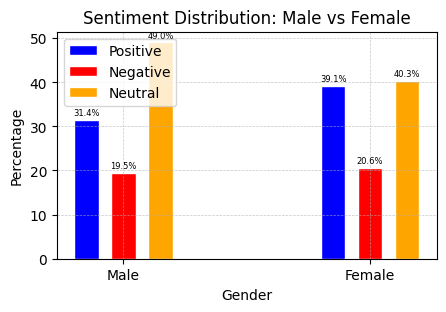

In [23]:
# Plotting the graph
gender = ['Male', 'Female']
sentiments = ['Positive', 'Negative', 'Neutral']
# Set the width of the bars
bar_width = 0.10
spacing = 0.05  # Adjust the spacing between bars

# Set the position of each bar on the x-axis
r1 = np.arange(len(gender))
r2 = r1 + bar_width + spacing
r3 = r2 + bar_width + spacing

# Create the DataFrame with average sentiment percentages
average_sentiments = pd.DataFrame({'Gender': gender,
                                   'Positive': [male_sentiment_percentages['positive'], female_sentiment_percentages['positive']],
                                   'Negative': [male_sentiment_percentages['negative'], female_sentiment_percentages['negative']],
                                   'Neutral': [male_sentiment_percentages['neutral'], female_sentiment_percentages['neutral']]})
plt.figure(figsize=(4.9, 2.95))  # Set the figure size in inches

# Create the bar plot
plt.bar(r1, average_sentiments['Positive'], color='blue', width=bar_width, edgecolor='white', label='Positive')
plt.bar(r2, average_sentiments['Negative'], color='red', width=bar_width, edgecolor='white', label='Negative')
plt.bar(r3, average_sentiments['Neutral'], color='orange', width=bar_width, edgecolor='white', label='Neutral')

# Add xticks and labels
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(r2, gender)  # Adjust the xticks position

# Add percentage values on top of each bar
for i, sentiment in enumerate(sentiments):
    for j, value in enumerate(average_sentiments[sentiment]):
        plt.text(j + (i * (bar_width + spacing)), value + 1, f'{value:.1f}%', ha='center', color='black', fontsize=6)

# Move the legends to the left side
plt.legend(loc='upper left')

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a title
plt.title('Sentiment Distribution: Male vs Female')

# Show the plot
plt.show()


##### Visualization for percentage for women education

In [24]:
# Create empty lists to store the sentiment distributions for males and females
male_sentiment_data = []
female_sentiment_data = []
# Loop through each keyword and calculate the sentiment of tweets containing that keyword
for keyword in ['women education']:
    keyword_tweets_male = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'male')].copy()
    keyword_tweets_female = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'female')].copy()
    # Calculate the sentiment score for each tweet using SentimentIntensityAnalyzer
    keyword_tweets_male['sentiment_score'] = keyword_tweets_male['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    keyword_tweets_female['sentiment_score'] = keyword_tweets_female['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    # Calculate the sentiment distribution for males
    sentiment_distribution_male = keyword_tweets_male['sentiment'].value_counts(normalize=True) * 100
    # Calculate the sentiment distribution for females
    sentiment_distribution_female = keyword_tweets_female['sentiment'].value_counts(normalize=True) * 100
    # Append the sentiment distributions for males and females to the respective lists
    male_sentiment_data.append(sentiment_distribution_male)
    female_sentiment_data.append(sentiment_distribution_female)
# Create DataFrames for males and females sentiment distributions
male_sentiment_df = pd.DataFrame(male_sentiment_data, index=['women education'])
female_sentiment_df = pd.DataFrame(female_sentiment_data, index=['women education'])
# Transpose the DataFrames to have sentiment categories as columns
male_sentiment_df = male_sentiment_df.T
female_sentiment_df = female_sentiment_df.T
# Combine the male and female DataFrames into a single DataFrame
combined_sentiment_df = pd.concat([male_sentiment_df, female_sentiment_df], axis=1, keys=['Male', 'Female'])
# Format the sentiment percentages to display two decimal places
combined_sentiment_df = combined_sentiment_df.round(2)
# Print the combined DataFrame
print("Sentiment Distribution on Women Education:")
combined_sentiment_df.head()

Sentiment Distribution on Women Education:


,Male,Female
,women education,women education
sentiment,,
neutral,59.09,46.32
positive,31.82,40.00
negative,9.09,13.68


Sentiment Distribution on Women Education:
                     Male          Female
          women education women education
sentiment                                
neutral             59.09           46.32
positive            31.82           40.00
negative             9.09           13.68


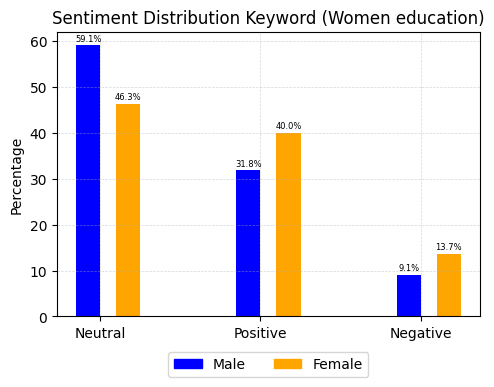

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create empty lists to store the sentiment distributions for males and females
male_sentiment_data = []
female_sentiment_data = []

# Loop through each keyword and calculate the sentiment of tweets containing that keyword
for keyword in ['women education']:
    keyword_tweets_male = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'male')].copy()
    keyword_tweets_female = df[(df['text'].str.contains(keyword)) & (df['gender'] == 'female')].copy()
    # Calculate the sentiment score for each tweet using SentimentIntensityAnalyzer
    keyword_tweets_male['sentiment_score'] = keyword_tweets_male['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    keyword_tweets_female['sentiment_score'] = keyword_tweets_female['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    # Calculate the sentiment distribution for males
    sentiment_distribution_male = keyword_tweets_male['sentiment'].value_counts(normalize=True) * 100
    # Calculate the sentiment distribution for females
    sentiment_distribution_female = keyword_tweets_female['sentiment'].value_counts(normalize=True) * 100
    # Append the sentiment distributions for males and females to the respective lists
    male_sentiment_data.append(sentiment_distribution_male)
    female_sentiment_data.append(sentiment_distribution_female)

# Create DataFrames for males and females sentiment distributions
male_sentiment_df = pd.DataFrame(male_sentiment_data, index=['women education'])
female_sentiment_df = pd.DataFrame(female_sentiment_data, index=['women education'])

# Transpose the DataFrames to have sentiment categories as columns
male_sentiment_df = male_sentiment_df.T
female_sentiment_df = female_sentiment_df.T

# Combine the male and female DataFrames into a single DataFrame
combined_sentiment_df = pd.concat([male_sentiment_df, female_sentiment_df], axis=1, keys=['Male', 'Female'])

# Format the sentiment percentages to display two decimal places
combined_sentiment_df = combined_sentiment_df.round(2)

# Print the combined DataFrame
print("Sentiment Distribution on Women Education:")
print(combined_sentiment_df)

# Extract sentiment categories and corresponding percentages for males and females
sentiment_categories = combined_sentiment_df.index
male_sentiment_percentages = combined_sentiment_df[('Male', 'women education')].values
female_sentiment_percentages = combined_sentiment_df[('Female', 'women education')].values

# Set the width of each bar (adjust as desired)
# Set the width of each bar (adjust as desired)
bar_width = 0.15

# Calculate the x positions for the bars
male_x = np.arange(len(sentiment_categories))
female_x = male_x + bar_width + 0.1  # Adding additional spacing between groups
plt.figure(figsize=(5, 4))  # Set the figure size in inches

# Set the y-axis label
plt.ylabel('Percentage')

# Plot the sentiment percentages for males
plt.bar(male_x, male_sentiment_percentages, width=bar_width, color='blue', label='Male')

# Plot the sentiment percentages for females
plt.bar(female_x, female_sentiment_percentages, width=bar_width, color='orange', label='Female')

# Set the title at the top
plt.title(f"Sentiment Distribution Keyword ({keyword.capitalize()})")

# Capitalize the first letter of each sentiment label
sentiment_categories = [sentiment.capitalize() for sentiment in sentiment_categories]

# Add labels for sentiment categories
plt.xticks(male_x + bar_width / 2, sentiment_categories)

# Add color patches and labels for male and female below the bars
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='orange', label='Female')
plt.legend(handles=[male_patch, female_patch], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add percentage labels on top of each bar with smaller font size for males
for x, percentage in enumerate(male_sentiment_percentages):
    plt.text(male_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)

# Add percentage labels on top of each bar with smaller font size for females
for x, percentage in enumerate(female_sentiment_percentages):
    plt.text(female_x[x], percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black', fontsize=6)

# Adjust the layout to provide space for the percentage labels
plt.tight_layout()

# Show the plot
plt.show()


##### Calculate the sentiment scores for all tweets

In [51]:
# Calculate sentiment scores for male and female tweets separately
male_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in df[df['gender'] == 'male']['text']]
female_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in df[df['gender'] == 'female']['text']]

# Compare the sentiment distributions using a t-test for males
male_t_stat, male_p_value = stats.ttest_1samp(male_sentiment_scores, 0)
print("Comparison of Sentiment for Male tweets:")
print("T-statistic:", male_t_stat)
print("P-value:", male_p_value)

# Compare the sentiment distributions using a t-test for females
female_t_stat, female_p_value = stats.ttest_1samp(female_sentiment_scores, 0)

comparison_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'T-Statistic': [male_t_stat, female_t_stat],
    'P-Value': [male_p_value, female_p_value]
})

print("Comparison of Sentiment for Female tweets:")
print("T-statistic:", female_t_stat)
print("P-value:", female_p_value)
comparison_df.head()

Comparison of Sentiment for Male tweets:
T-statistic: 13.599393353393825
P-value: 6.610972862019238e-42
Comparison of Sentiment for Female tweets:
T-statistic: 42.01118245415419
P-value: 0.0


,Gender,T-Statistic,P-Value
0,Male,13.599393,6.610973e-42
1,Female,42.011182,0.000000e+00


In [27]:
import scipy.stats as stats
from textblob import TextBlob

keywords = ['women', 'education', 'school', 'university', 'girl']

# Filter male tweets containing the keywords
male_education_tweets = df[(df['text'].str.contains('|'.join(keywords), case=False)) & (df['gender'] == 'male')]

# Filter female tweets containing the keywords
female_education_tweets = df[(df['text'].str.contains('|'.join(keywords), case=False)) & (df['gender'] == 'female')]

# Calculate sentiment scores for male tweets using TextBlob
male_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in male_education_tweets['text']]

# Calculate sentiment scores for female tweets using TextBlob
female_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in female_education_tweets['text']]

# Perform one-sample t-test for male tweets
male_t_stat, male_p_value = stats.ttest_1samp(male_sentiment_scores, 0)

# Perform one-sample t-test for female tweets
female_t_stat, female_p_value = stats.ttest_1samp(female_sentiment_scores, 0)

# Print the comparison results for male tweets
print("Comparison of Sentiment for Men Education Tweets:")
print("T-statistic:", male_t_stat)
print("P-value:", male_p_value)

# Print the comparison results for female tweets
print("Comparison of Sentiment for Women Education Tweets:")
print("T-statistic:", female_t_stat)
print("P-value:", female_p_value)

comparison_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'T-Statistic': [male_t_stat, female_t_stat],
    'P-Value': [male_p_value, female_p_value]
})
comparison_df.head()

Comparison of Sentiment for Men Education Tweets:
T-statistic: 12.231948695842332
P-value: 4.973315741949932e-34
Comparison of Sentiment for Women Education Tweets:
T-statistic: 28.321007413299096
P-value: 1.696955272097814e-171


,Gender,T-Statistic,P-Value
0,Male,12.231949,4.973316e-34
1,Female,28.321007,1.696955e-171


In [28]:
import scipy.stats as stats
keyword = 'women education'
# Filter male tweets containing the keyword
male_education_tweets = df[(df['text'].str.contains(keyword, case=False)) & (df['gender'] == 'male')]
# Filter female tweets containing the keyword
female_education_tweets = df[(df['text'].str.contains(keyword, case=False)) & (df['gender'] == 'female')]
# Calculate sentiment scores for male tweets using TextBlob
male_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in male_education_tweets['text']]
# Calculate sentiment scores for female tweets using TextBlob
female_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in female_education_tweets['text']]
# Perform one-sample t-test for male tweets
male_t_stat, male_p_value = stats.ttest_1samp(male_sentiment_scores, 0)
# Perform one-sample t-test for female tweets
female_t_stat, female_p_value = stats.ttest_1samp(female_sentiment_scores, 0)
# Print the comparison results for male tweets
print("Comparison of Sentiment for Men Education Tweets:")
print("T-statistic:", male_t_stat)
print("P-value:", male_p_value)
# Print the comparison results for female tweets
print("Comparison of Sentiment for Women Education Tweets:")
print("T-statistic:", female_t_stat)
print("P-value:", female_p_value)
comparison_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'T-Statistic': [male_t_stat, female_t_stat],
    'P-Value': [male_p_value, female_p_value]
})
comparison_df.head()

Comparison of Sentiment for Men Education Tweets:
T-statistic: 2.5953068802040136
P-value: 0.011091143507551329
Comparison of Sentiment for Women Education Tweets:
T-statistic: 3.432135926285973
P-value: 0.0008918697804590749


,Gender,T-Statistic,P-Value
0,Male,2.595307,0.011091
1,Female,3.432136,0.000892


In [29]:
from scipy.stats import chi2_contingency

# Cross-tabulate gender and label
contingency_table_male = pd.crosstab(df[df['gender'] == 'male']['sentiment'], df[df['gender'] == 'male']['label'] == 1)
contingency_table_female = pd.crosstab(df[df['gender'] == 'female']['sentiment'], df[df['gender'] == 'female']['label'] == 1)

# Perform chi-square test for male gender
chi2_male, p_value_male, _, _ = chi2_contingency(contingency_table_male)

# Perform chi-square test for female gender
chi2_female, p_value_female, _, _ = chi2_contingency(contingency_table_female)

# Print the results for male gender
print("Chi-square Test of Independence for Male Gender:")
print("Chi-square:", chi2_male)
print("P-value:", p_value_male)

# Print the results for female gender
print("Chi-square Test of Independence for Female Gender:")
print("Chi-square:", chi2_female)
print("P-value:", p_value_female)


Chi-square Test of Independence for Male Gender:
Chi-square: 53.37665005657765
P-value: 2.566892665066179e-12
Chi-square Test of Independence for Female Gender:
Chi-square: 35.16474524921437
P-value: 2.3124512736888165e-08


In [30]:
cross_tab = pd.crosstab(df['gender'], df['label'])
# Print the cross-tabulation
print("Cross-Tabulation of Gender and Label:")
print(cross_tab)

Cross-Tabulation of Gender and Label:
label       0      1
gender              
female  21222  13616
male    10934   6474


In [31]:
from collections import Counter
# Combine all the text into a single string
all_text = ' '.join(df['text'].tolist())
# Split the text into individual words
all_words = all_text.split()
# Count the occurrences of each word
word_counts = Counter(all_words)
# Retrieve the most common words
most_common_words = word_counts.most_common(10)
# Extract the words and their frequencies
words = [word for word, count in most_common_words]
frequencies = [count for word, count in most_common_words]
# Print the most common words and their frequencies
for word, count in most_common_words:
    print(f'{word}: {count}')


taliban: 21377
women: 14352
afghanistan: 12051
girl: 8293
afghan: 7289
people: 5061
school: 4160
education: 3749
kabul: 3742
rights: 3515


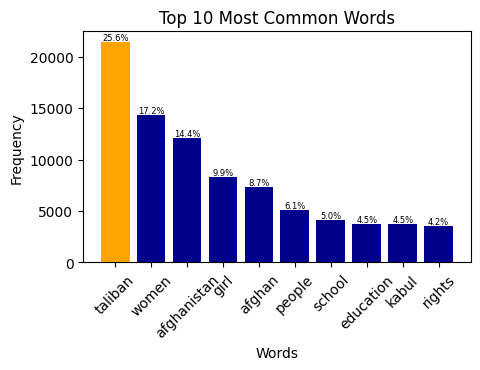

In [32]:
# Calculate the total frequency of all words
total_frequency = sum(frequencies)

# Calculate the percentages
percentages = [count / total_frequency * 100 for count in frequencies]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(5, 3))

# Create a bar chart for the most common words
bars = ax.bar(words, frequencies, color=['orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'])

# Add labels and title
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Most Common Words')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentage labels above each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=6)

# Show the chart
plt.show()


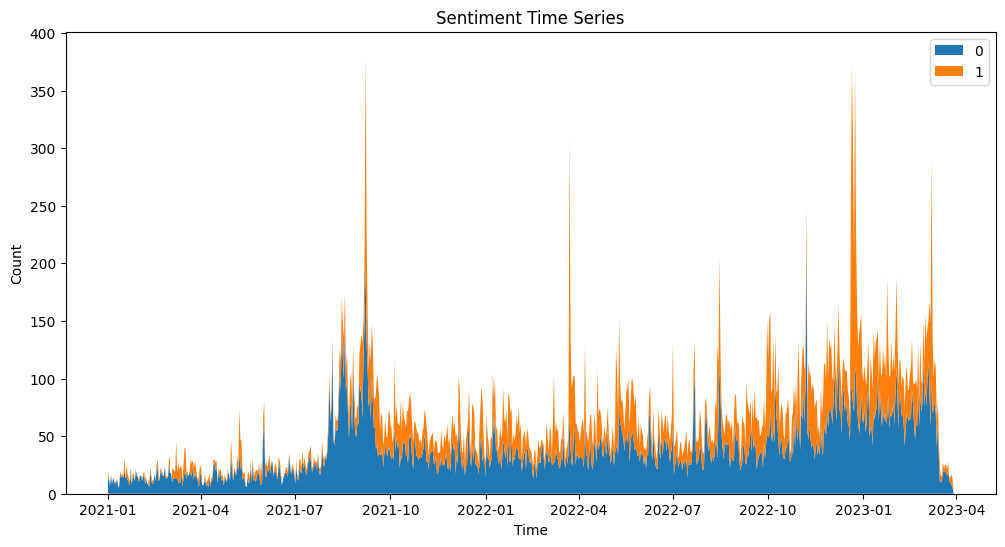

In [33]:
# Group sentiment counts by 'created_at' and 'label'
sentiment_counts = df.groupby(['created_at', 'label']).size().unstack()

# Convert time periods to datetime objects
time_periods = pd.to_datetime(sentiment_counts.index)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked area plot for sentiment categories
ax.stackplot(time_periods, sentiment_counts.T, labels=sentiment_counts.columns)

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Sentiment Time Series')

# Add legend
ax.legend()

# Show the chart
plt.show()


In [34]:
# Assuming your dataset is stored in a DataFrame called 'df' with a 'gender' column

# Calculate the frequency of tweets based on gender
gender_frequency = df['gender'].value_counts()

# Print the frequency counts
print(gender_frequency)


gender
female    34838
male      17408
Name: count, dtype: int64


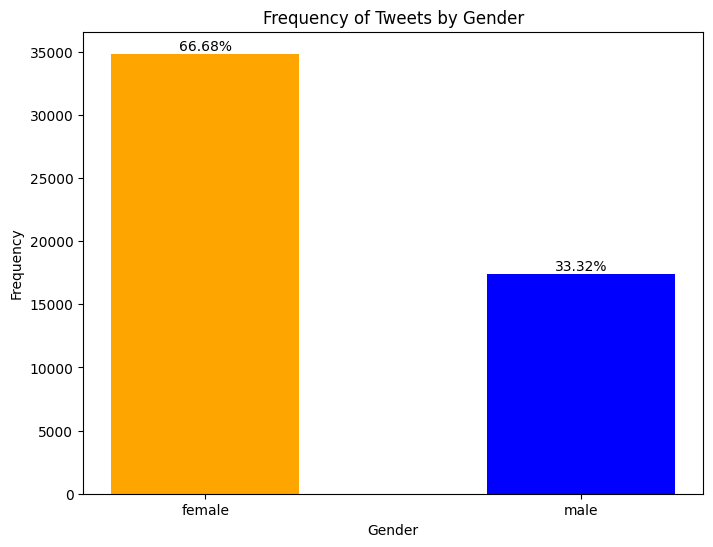

In [35]:


# Calculate the frequency count based on gender
gender_frequency = df['gender'].value_counts()

# Define the colors for the bars
colors = ['orange', 'blue']
width = 0.5

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
ax.bar(gender_frequency.index, gender_frequency, color=colors, width=width)

# Add percentage labels on top of the bars
total_count = gender_frequency.sum()
for i, count in enumerate(gender_frequency):
    percentage = count / total_count * 100
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')
# Set the labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Tweets by Gender')

# Show the chart
plt.show()


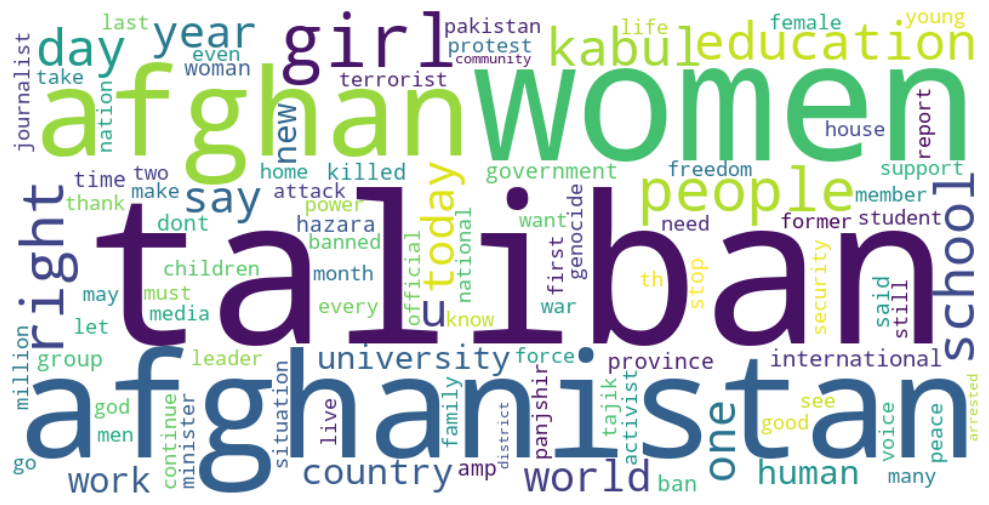

In [36]:
from wordcloud import WordCloud
from PIL import Image

text = ' '.join(df['text'])

# Create a WordCloud object with customized options
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=3, contour_color='steelblue',
                      prefer_horizontal=0.8, relative_scaling=0.5,
                      collocations=False).generate(text)
# Add a central word
wordcloud.generate_from_text("Afghanistan")
# Manipulate font sizes for the central word and other words
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=3, contour_color='steelblue',
                      prefer_horizontal=0.8, relative_scaling=0.5,
                      collocations=False).generate(text)
wordcloud.words_["Afghanistan"] = 80  # Set font size for the central word
# Display the word cloud using matplotlib

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()
